In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
from PIL import Image
from tensorflow.keras import Input


Примеры геометрических фигур:


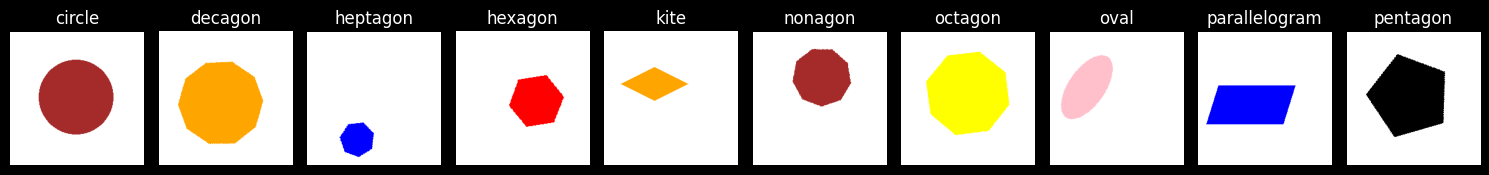

In [7]:
# ===== ПОКАЗ ИЗОБРАЖЕНИЙ =====
print("\nПримеры геометрических фигур:")

# Список путей к изображениям
image_paths = [
    "2D_Geometric_Shapes_Dataset/circle/circle_5.png",
    "2D_Geometric_Shapes_Dataset/decagon/decagon_91.png",
    "2D_Geometric_Shapes_Dataset/heptagon/heptagon_9.png",
    "2D_Geometric_Shapes_Dataset/hexagon/hexagon_97.png",
    "2D_Geometric_Shapes_Dataset/kite/kite_26.png",
    "2D_Geometric_Shapes_Dataset/nonagon/nonagon_5.png",
    "2D_Geometric_Shapes_Dataset/octagon/octagon_26.png",
    "2D_Geometric_Shapes_Dataset/oval/oval_39.png",
    "2D_Geometric_Shapes_Dataset/parallelogram/parallelogram_3.png",
    "2D_Geometric_Shapes_Dataset/pentagon/pentagon_14.png"
]

# Отображение изображений
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, img_path in enumerate(image_paths):
    try:
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(img_path.split('/')[-1].split("_")[0])
        axes[i].axis('off')
    except:
        print(f"Изображение {img_path} не найдено")
        axes[i].text(0.5, 0.5, 'Not found', ha='center', va='center')
        axes[i].axis('off')
plt.tight_layout()
plt.show()

In [4]:
DATA_DIR   = Path("2D_Geometric_Shapes_Dataset")   # папка с классами
IMG_SIZE   = 28                # финальный размер
CLASS_NAMES = [d.name for d in DATA_DIR.iterdir() if d.is_dir()]
print("Найдены классы:", CLASS_NAMES)

Найдены классы: ['circle', 'decagon', 'heptagon', 'hexagon', 'kite', 'nonagon', 'octagon', 'oval', 'parallelogram', 'pentagon', 'rectangle', 'rhombus', 'semicircle', 'square', 'star', 'trapezoid', 'triangle']


In [7]:
# ------------------------------------------------------------------
# 2. Загрузка картинок в numpy-arrays
# ------------------------------------------------------------------
def load_dataset(path: Path, img_size: int):
    images, labels = [], []
    for label, class_name in enumerate(CLASS_NAMES):
        class_dir = path / class_name
        for file in class_dir.glob("*"):
            try:
                img = Image.open(file).convert("L")          # grayscale
                img = img.resize((img_size, img_size))
                arr = np.asarray(img, dtype=np.float32) / 255.0
                images.append(arr)
                labels.append(label)
            except Exception as e:
                print("Ошибка чтения", file, e)
    return np.array(images), np.array(labels)

X, y = load_dataset(DATA_DIR, IMG_SIZE)

# добавляем канал (N, 28, 28) -> (N, 28, 28, 1)
X = X[..., np.newaxis]

In [8]:
# ------------------------------------------------------------------
# 3. Разбиение на train/val/test
# ------------------------------------------------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Формы:", X_train.shape, X_val.shape, X_test.shape)

Формы: (595000, 28, 28, 1) (127500, 28, 28, 1) (127500, 28, 28, 1)


In [14]:
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 1))
x = layers.Conv2D(16, 3, activation='relu')(inputs)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(len(CLASS_NAMES), activation='softmax')(x)

model = keras.Model(inputs, outputs)

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# ------------------------------------------------------------------
# 5. Обучение
# ------------------------------------------------------------------
history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/15
18594/18594 - 49s - 3ms/step - accuracy: 0.6755 - loss: 0.8649 - val_accuracy: 0.8656 - val_loss: 0.3704
Epoch 2/15
18594/18594 - 66s - 4ms/step - accuracy: 0.8371 - loss: 0.4030 - val_accuracy: 0.9053 - val_loss: 0.2513
Epoch 3/15
18594/18594 - 61s - 3ms/step - accuracy: 0.8762 - loss: 0.3072 - val_accuracy: 0.9325 - val_loss: 0.1805
Epoch 4/15
18594/18594 - 55s - 3ms/step - accuracy: 0.8962 - loss: 0.2589 - val_accuracy: 0.9258 - val_loss: 0.1801
Epoch 5/15
18594/18594 - 58s - 3ms/step - accuracy: 0.9080 - loss: 0.2300 - val_accuracy: 0.9319 - val_loss: 0.1641
Epoch 6/15
18594/18594 - 69s - 4ms/step - accuracy: 0.9176 - loss: 0.2073 - val_accuracy: 0.9502 - val_loss: 0.1244
Epoch 7/15
18594/18594 - 85s - 5ms/step - accuracy: 0.9243 - loss: 0.1922 - val_accuracy: 0.9459 - val_loss: 0.1280
Epoch 8/15
18594/18594 - 83s - 4ms/step - accuracy: 0.9299 - loss: 0.1795 - val_accuracy: 0.9628 - val_loss: 0.0993
Epoch 9/15
18594/18594 - 77s - 4ms/step - accuracy: 0.9336 - loss: 0.170

In [17]:
# ------------------------------------------------------------------
# 6. Оценка
# ------------------------------------------------------------------
y_pred = model.predict(X_test, verbose=0).argmax(axis=1)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=CLASS_NAMES))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Test accuracy: 0.9616156862745098
               precision    recall  f1-score   support

       circle       0.87      0.98      0.92      7500
      decagon       0.80      0.87      0.83      7500
     heptagon       0.95      0.94      0.95      7500
      hexagon       0.97      0.97      0.97      7500
         kite       1.00      1.00      1.00      7500
      nonagon       0.88      0.75      0.81      7500
      octagon       0.91      0.89      0.90      7500
         oval       1.00      1.00      1.00      7500
parallelogram       1.00      1.00      1.00      7500
     pentagon       1.00      0.97      0.98      7500
    rectangle       1.00      1.00      1.00      7500
      rhombus       1.00      1.00      1.00      7500
   semicircle       0.99      0.99      0.99      7500
       square       1.00      1.00      1.00      7500
         star       1.00      1.00      1.00      7500
    trapezoid       1.00      1.00      1.00      7500
     triangle       1.00      

In [18]:
# ------------------------------------------------------------------
# 7. Сохранение
# ------------------------------------------------------------------
model.save("models/shapes_real_cnn.h5")
print("Модель сохранена в shapes_real_cnn.h5")

Модель сохранена в shapes_real_cnn.h5


In [20]:
model.save("models/shapes_real_cnn.keras")
print("Модель сохранена в shapes_real_cnn.keras")

Модель сохранена в shapes_real_cnn.keras


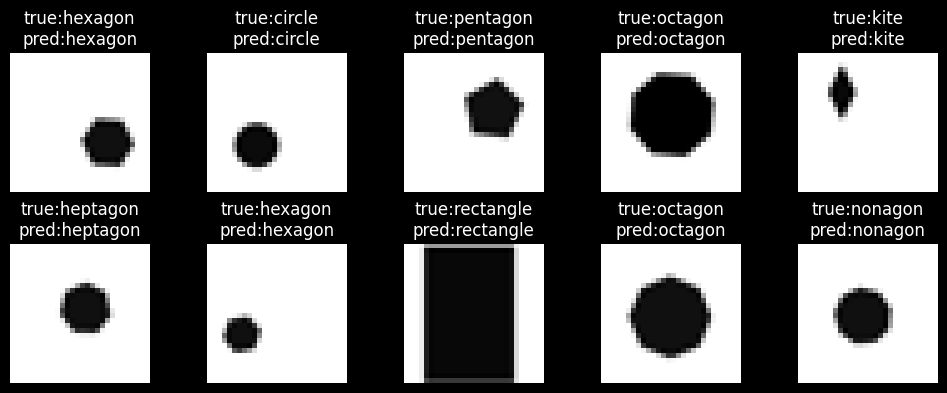

In [21]:
# ------------------------------------------------------------------
# 8. Быстрая визуализация предсказаний
# ------------------------------------------------------------------
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title(f"true:{CLASS_NAMES[y_test[i]]}\npred:{CLASS_NAMES[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout(); plt.show()